In [1]:
# Documentação: Importando as bibliotecas necessárias
# pandas: para manipulação e análise de dados.
# matplotlib.pyplot e seaborn: para criar gráficos e visualizações.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Documentação: Carregando o conjunto de dados
# Como fizemos o upload do arquivo para o ambiente do Colab,
# podemos lê-lo diretamente apenas pelo nome.
# O pandas vai procurar o arquivo no mesmo nível do nosso notebook.
nome_arquivo = "Telco-Customer-Churn.csv"
df_dados = pd.read_csv(nome_arquivo)

# Documentação: Primeiras visualizações dos dados
# O comando '.head()' nos mostra as 5 primeiras linhas da nossa tabela.
print("As 5 primeiras linhas dos dados:")
print(df_dados.head())

# O comando '.info()' nos dá um resumo técnico do DataFrame.
print("\nInformações sobre o conjunto de dados:")
df_dados.info()

As 5 primeiras linhas dos dados:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

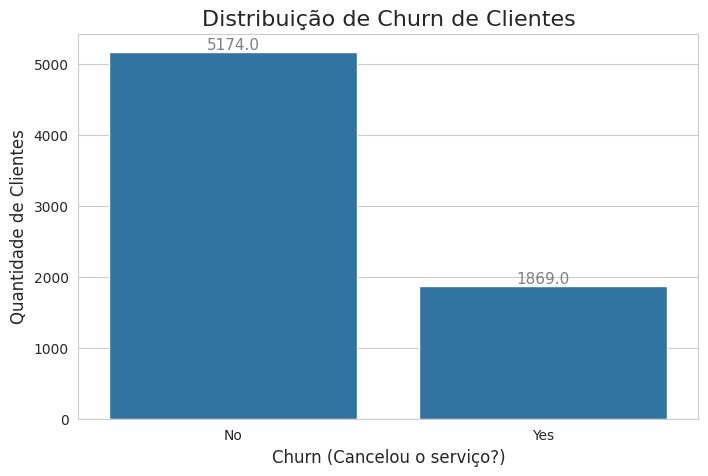


Porcentagem de Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [2]:
# Documentação: Análise da variável alvo 'Churn'
# Vamos começar analisando a coluna mais importante do nosso dataset.

# Configurando o estilo dos gráficos para um visual mais agradável.
sns.set_style("whitegrid")

# Criando uma figura e um eixo para o nosso gráfico.
# 'figsize=(8, 5)' define o tamanho da imagem.
plt.figure(figsize=(8, 5))

# O 'sns.countplot' é perfeito para contar a frequência de cada categoria em uma coluna.
# Estamos contando quantos "Yes" e "No" existem na coluna 'Churn'.
ax = sns.countplot(x='Churn', data=df_dados)

# Adicionando títulos para o gráfico ficar mais informativo.
plt.title('Distribuição de Churn de Clientes', fontsize=16)
plt.xlabel('Churn (Cancelou o serviço?)', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

# Opcional: Adicionando os números exatos em cima de cada barra para clareza.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')

# Exibindo o gráfico.
plt.show()

# Calculando a porcentagem para termos uma ideia numérica.
churn_percentage = (df_dados['Churn'].value_counts(normalize=True) * 100)
print("\nPorcentagem de Churn:")
print(churn_percentage)

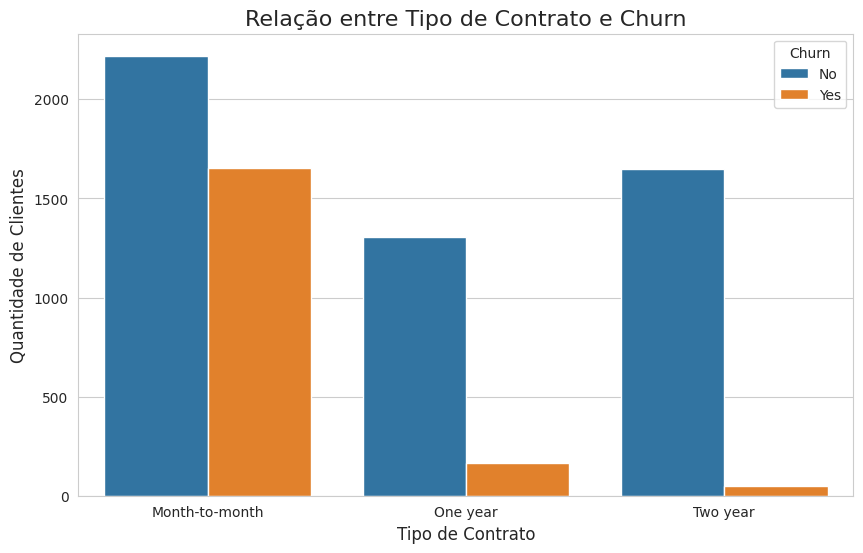

In [3]:
# Documentação: Analisando o Churn por Tipo de Contrato
# Queremos ver se existe uma relação entre o tipo de contrato e a decisão de cancelar.

plt.figure(figsize=(10, 6))

# Aqui, usamos o 'countplot' novamente, mas adicionamos o parâmetro 'hue="Churn"'.
# Isso cria barras separadas para 'Yes' e 'No' dentro de cada categoria de 'Contract'.
ax = sns.countplot(x='Contract', hue='Churn', data=df_dados)

plt.title('Relação entre Tipo de Contrato e Churn', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Churn') # Adiciona uma legenda para explicar as cores.

plt.show()

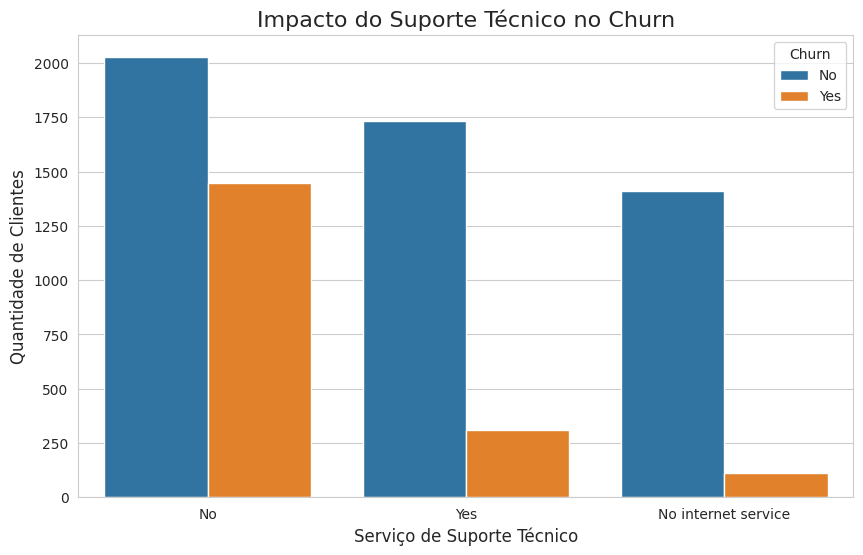

In [4]:
# Documentação: Analisando o Churn por Serviço de Suporte Técnico

plt.figure(figsize=(10, 6))

# A lógica é a mesma do gráfico anterior, apenas trocamos a coluna do eixo x.
sns.countplot(x='TechSupport', hue='Churn', data=df_dados)

plt.title('Impacto do Suporte Técnico no Churn', fontsize=16)
plt.xlabel('Serviço de Suporte Técnico', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Churn')

plt.show()

In [5]:
# Documentação: Iniciando o Pré-processamento dos Dados

# Primeiro, vamos criar uma cópia do nosso DataFrame original.
# É uma boa prática para garantir que não vamos alterar os dados brutos.
df_processado = df_dados.copy()

# Documentação: Identificando e transformando colunas com texto (categóricas)
# A biblioteca scikit-learn tem uma ferramenta perfeita para isso, a 'LabelEncoder'.
from sklearn.preprocessing import LabelEncoder

# Criando o nosso "codificador"
le = LabelEncoder()

# Vamos percorrer cada coluna do nosso DataFrame.
for coluna in df_processado.columns:
    # Verificamos se o tipo da coluna é 'object', que é como o pandas chama as colunas de texto.
    if df_processado[coluna].dtype == 'object':
        # Se for texto, aplicamos o LabelEncoder, que transforma o texto em números.
        # Ex: ['No', 'Yes', 'No'] se torna [0, 1, 0]
        df_processado[coluna] = le.fit_transform(df_processado[coluna])

# Documentação: Verificando o resultado da transformação
# Vamos usar o '.head()' para ver como ficou nossa tabela após a conversão.
print("DataFrame após a conversão de texto para números:")
print(df_processado.head())

# Usando o '.info()' novamente para confirmar que não temos mais colunas do tipo 'object'.
print("\nNovas informações sobre o conjunto de dados:")
df_processado.info()

DataFrame após a conversão de texto para números:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0       

In [6]:
# Documentação: Separando as variáveis de entrada (X) e a variável alvo (y)

# A coluna 'customerID' é inútil para o modelo, pois é um identificador único. Vamos removê-la.
# A coluna 'Churn' é o nosso alvo, o que queremos prever.
# Todas as outras colunas são as características que o modelo usará para aprender.

# 'X' receberá todas as colunas, EXCETO 'customerID' e 'Churn'.
X = df_processado.drop(['customerID', 'Churn'], axis=1)

# 'y' receberá apenas a coluna 'Churn'.
y = df_processado['Churn']


# Documentação: Verificando as dimensões dos nossos novos conjuntos de dados
print("Dimensões de X (características):", X.shape)
print("Dimensões de y (alvo):", y.shape)

# Visualizando as primeiras linhas de X para confirmar
print("\nPrimeiras 5 linhas das características (X):")
print(X.head())

Dimensões de X (características): (7043, 19)
Dimensões de y (alvo): (7043,)

Primeiras 5 linhas das características (X):
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  St

In [7]:
# Documentação: Importando a função para dividir os dados
from sklearn.model_selection import train_test_split

# Documentação: Realizando a divisão
# X: nossas características (features)
# y: nosso alvo (target)
# test_size=0.2: significa que queremos 20% dos dados para o conjunto de teste.
# random_state=42: garante que a divisão seja sempre a mesma, tornando nosso experimento reprodutível.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Documentação: Verificando o resultado da divisão
print("Quantidade de dados para treino:", len(X_treino))
print("Quantidade de dados para teste:", len(X_teste))

Quantidade de dados para treino: 5634
Quantidade de dados para teste: 1409


In [8]:
# Documentação: Importando o modelo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Documentação: Criando a instância do modelo
# Usamos random_state=42 aqui também para garantir a consistência dos resultados.
modelo_rf = RandomForestClassifier(random_state=42)

# Documentação: Treinando o modelo!
# O método '.fit()' é o comando que efetivamente "ensina" o modelo,
# fazendo com que ele aprenda a relação entre as características (X_treino) e o alvo (y_treino).
modelo_rf.fit(X_treino, y_treino)

print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!


In [9]:
# Documentação: Fazendo previsões nos dados de teste
# O método '.predict()' usa o modelo que já foi treinado para fazer previsões em dados novos.
y_pred = modelo_rf.predict(X_teste)

# Documentação: Visualizando algumas das previsões
# Vamos comparar as 10 primeiras previsões do modelo com os 10 primeiros resultados reais.
# Lembre-se: 1 significa 'Yes' (Churn) e 0 significa 'No' (Não Churn).
print("Previsões do modelo (primeiros 10):", y_pred[:10])
print("Resultados reais (primeiros 10):   ", y_teste.values[:10])

Previsões do modelo (primeiros 10): [1 0 0 1 0 0 0 0 0 0]
Resultados reais (primeiros 10):    [1 0 0 1 0 1 0 0 1 1]


In [10]:
# Documentação: Importando a função de acurácia
from sklearn.metrics import accuracy_score

# Documentação: Calculando a acurácia
# Comparamos os resultados reais (y_teste) com as previsões do modelo (y_pred).
acuracia = accuracy_score(y_teste, y_pred)

# Exibindo o resultado de forma formatada (em porcentagem).
print(f"A acurácia do modelo Random Forest é de: {acuracia * 100:.2f}%")

A acurácia do modelo Random Forest é de: 79.84%


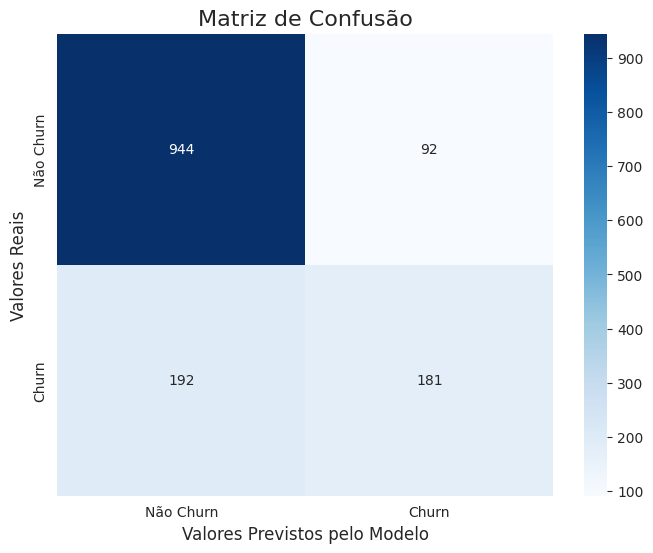

In [11]:
# Documentação: Importando a matriz de confusão
from sklearn.metrics import confusion_matrix

# Calculando a matriz
matriz_confusao = confusion_matrix(y_teste, y_pred)

# Documentação: Criando uma visualização mais bonita para a matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])

plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Valores Previstos pelo Modelo', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)
plt.show()

In [12]:
# Documentação: Importando o relatório de classificação
from sklearn.metrics import classification_report

# Gerando e imprimindo o relatório
print("Relatório de Classificação:")
print(classification_report(y_teste, y_pred, target_names=['Não Churn', 'Churn']))

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.83      0.91      0.87      1036
       Churn       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

